# Collisions

In [1]:

import heapq
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [145]:
import numpy as np
import matplotlib.pyplot as plt

class Visualisations:
    def __init__(self):
        pass

    def plot(self, collision_layer):
        print("Before transformation shape:", collision_layer.shape)  # Debugging

        # Correctly swap x and y axes
        collision_layer = np.transpose(collision_layer)

        print("After transformation shape:", collision_layer.shape)  # Debugging

        plt.figure(figsize=(10, 10))
        plt.imshow(collision_layer, cmap="gray", origin="upper")  # Corrected background
        plt.title("Collision Layer")
        plt.colorbar(label="Collision (1 = Blocked, 0 = Free)")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()

    def plot_path(self, collision_layer, path, start, goal):
        print("Before transformation shape:", collision_layer.shape)  # Debugging

        # Correctly swap x and y axes
        # collision_layer = np.transpose(collision_layer)
        collision_layer = collision_layer

        print("After transformation shape:", collision_layer.shape)  # Debugging

        plt.figure(figsize=(20, 20))
        plt.imshow(collision_layer, cmap="gray", origin="upper")  # Background is now correctly swapped

        if path:
            path_x, path_y = zip(*path)  # Keep path in (x, y) order
            plt.plot(path_x, path_y, marker="o", color="blue", markersize=5, linestyle="-", label="Path")

        plt.scatter(start[0], start[1], color="green", s=100, label="Start")  # x first, y second
        plt.scatter(goal[0], goal[1], color="red", s=100, label="Goal")  # x first, y second

        plt.legend()
        plt.title("Pathfinding Visualization")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()


In [146]:
import heapq
import numpy as np
from PIL import Image  # Ensure you have PIL for image processing

class AStar:
    def __init__(self):
        self.colors = {
            "black": (0, 0, 0),
            "white": (255, 255, 255),
            "thuis": (255, 0, 0),
            "school": (0, 255, 0),
            "vrije tijd": (0, 0, 255),
            "grey": (128, 128, 128),
            "brown": (143, 110, 26),
            "vriend thuis": (155, 0, 0)
        }
        self.collisions = self.set_collision()

    def set_collision(self):
        """voor pathfinding"""
        activity_combinations = [['thuis'], ['school'], ['vrije tijd'], ['vriend thuis'],
                                 ['thuis', 'black', 'school'],
                                 ['thuis', 'black', 'vrije tijd'],
                                 ['thuis', 'black', 'vriend thuis'],
                                 ['school', 'black', 'thuis'],
                                 ['school', 'black', 'vrije tijd'],
                                 ['school', 'black', 'vriend thuis'],
                                 ['vrije tijd', 'black', 'thuis'],
                                 ['vrije tijd', 'black', 'school'],
                                 ['vrije tijd', 'black', 'vriend thuis'],
                                 ['vriend thuis', 'black', 'thuis'],
                                 ['vriend thuis', 'black', 'school'],
                                 ['vriend thuis', 'black', 'vrije tijd']]
        colissions = {}
        for activity in activity_combinations:
            colors_rgb = [self.colors[color] for color in activity]
            path = "/Users/youssefboulfiham/PycharmProjects/pythonProject/Youssef-Nieuwegein/graphics/enviroment_activity.png"
            image = Image.open(path).convert("RGB")
            width, height = image.size
            pixels = image.load()
            sprite = np.zeros((height, width), dtype=int)
            for y in range(height):
                for x in range(width):
                    if pixels[x, y] not in colors_rgb:
                        sprite[y, x] = 1
            colissions[f"{activity}"] = sprite
        return colissions

    def search_path(self, start, end, activity):
        collisions = self.collisions[activity]

        open_set = []
        heapq.heappush(open_set, (0, tuple(start)))  # Keep original input format
        came_from = {}
        g_score = {tuple(start): 0}
        f_score = {tuple(start): self.heuristic(start, end)}

        while open_set:
            _, current = heapq.heappop(open_set)

            if current == tuple(end):  # Ensure end comparison works
                path = []
                while current in came_from:
                    path.append(list(current))  # Maintain original format (y, x)
                    current = came_from[current]
                path.append(list(start))  
                return path[::-1]

            for neighbor in self.get_neighbors(current, collisions):
                tentative_g_score = g_score[current] + 1
                if tuple(neighbor) not in g_score or tentative_g_score < g_score[tuple(neighbor)]:
                    came_from[tuple(neighbor)] = current
                    g_score[tuple(neighbor)] = tentative_g_score
                    f_score[tuple(neighbor)] = tentative_g_score + self.heuristic(neighbor, end)
                    heapq.heappush(open_set, (f_score[tuple(neighbor)], tuple(neighbor)))

        print(f"No path: {activity}, {start}, {end}")
        return [list(start)]

    @staticmethod
    def heuristic(a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Always evaluate [0] as x, [1] as y

    @staticmethod
    def get_neighbors(node, collisions):
        height, width = collisions.shape  # Ensure correct shape ordering
        x, y = node[0], node[1]  # Always use 0 as x, 1 as y
        neighbors = []
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dx, dy in directions:
            nx, ny = x + dx, y + dy  # Maintain x-first order
            if 0 <= nx < width and 0 <= ny < height and collisions[ny, nx] == 0:
                neighbors.append([nx, ny])  # Maintain lists
        
        return neighbors  # Ensure it always returns a list, even if empty



Before transformation shape: (700, 500)
After transformation shape: (700, 500)


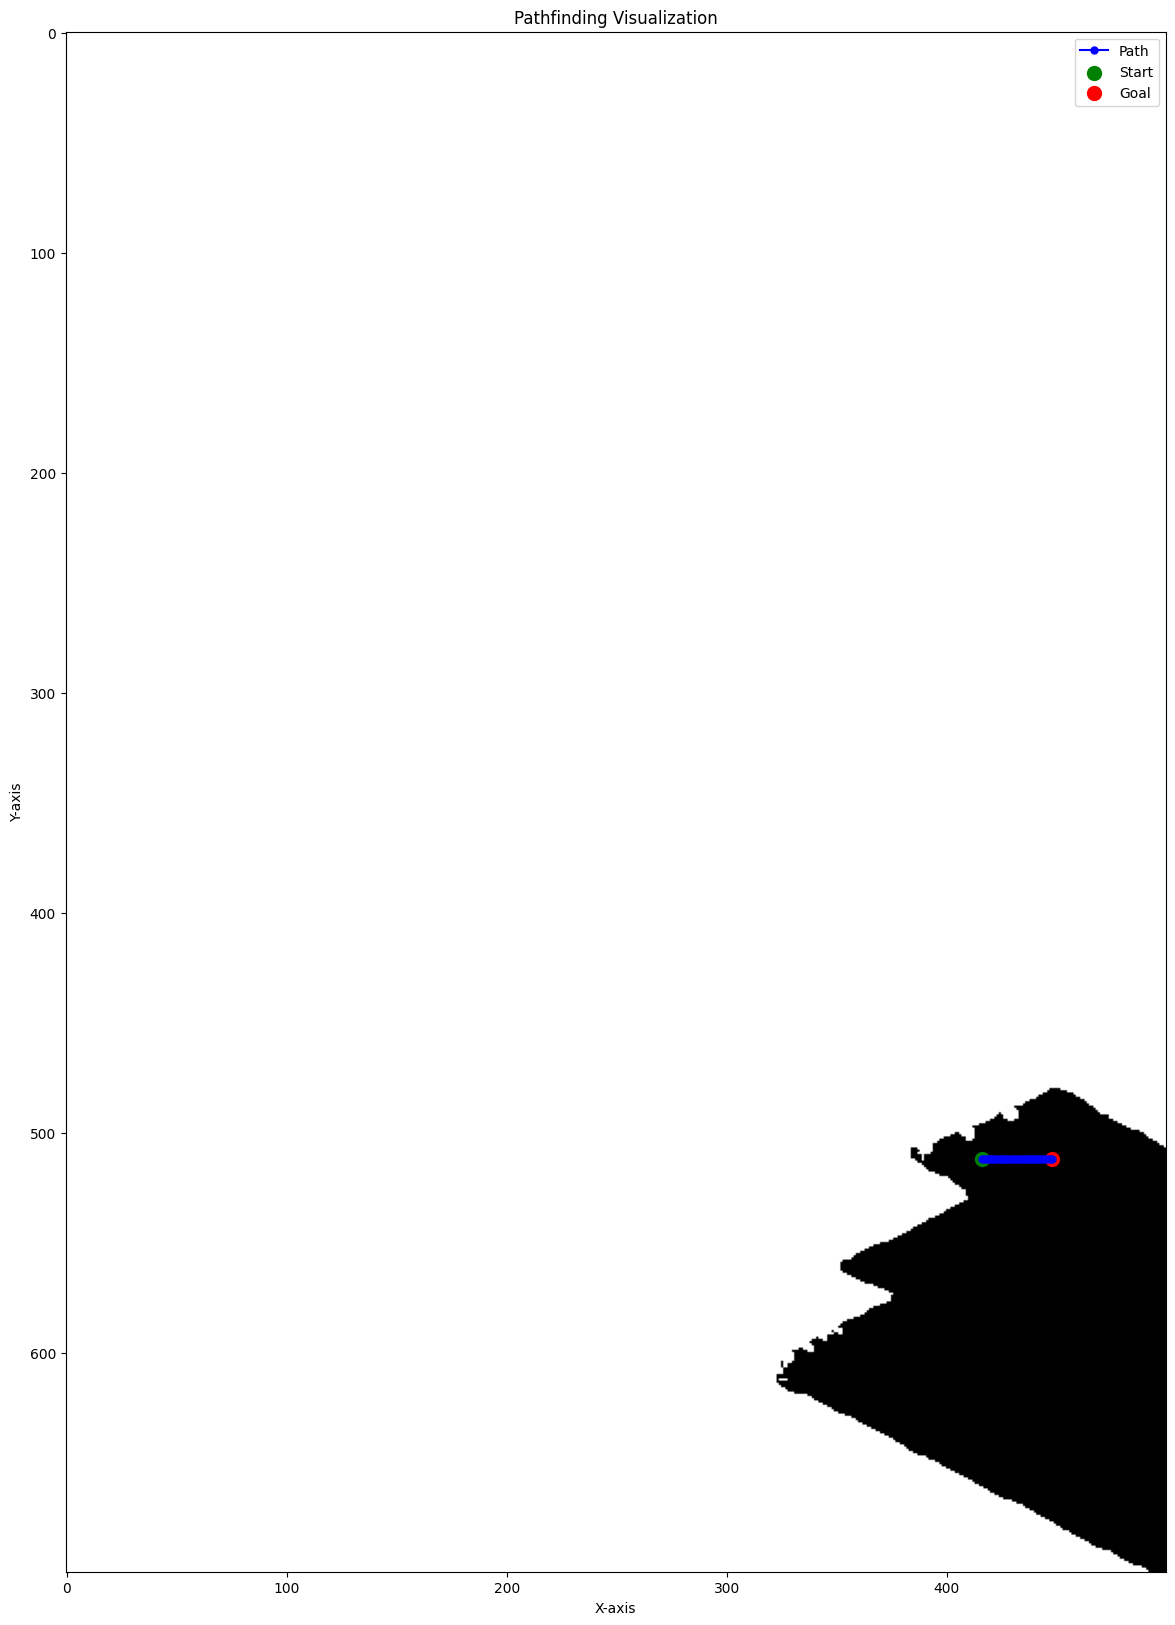

33 [[416, 512], [417, 512], [418, 512], [419, 512], [420, 512], [421, 512], [422, 512], [423, 512], [424, 512], [425, 512], [426, 512], [427, 512], [428, 512], [429, 512], [430, 512], [431, 512], [432, 512], [433, 512], [434, 512], [435, 512], [436, 512], [437, 512], [438, 512], [439, 512], [440, 512], [441, 512], [442, 512], [443, 512], [444, 512], [445, 512], [446, 512], [447, 512], [448, 512]]


In [157]:
Pathfinding = AStar()
# start, goal = (76, 256), (368, 256)
# start, goal = (245, 285), (352, 384)
# allowed_colors=['green', 'black', 'red dark']
allowed_colors, start, goal = "['vrije tijd']", (416, 512), (448, 512)
# # allowed_colors, start, goal = ['green', 'black', 'red dark'], [368, 160], (292, 112)
path = Pathfinding.search_path(start=start,
                               end=goal,
                               activity=allowed_colors)
Visualizer = Visualisations()
Visualizer.plot_path(Pathfinding.collisions[allowed_colors], path, start, goal)
print(len(path), path)
# Pathfinding.collisions["['thuis']"]


In [5]:
stop
Pathfinding = AStar()
school = (600, 400)
allowed_colors = ["black", "blue"]
path = Pathfinding.search_path(start=weg_hart, goal=school, allowed_colors=allowed_colors)
Visualizer = Visualisations()
Visualizer.plot_path(f"{allowed_colors}.txt", path, weg_hart, school)

NameError: name 'stop' is not defined

In [ ]:
class Visualisations:
    def __init__(self):
        pass
        
    def plot(self, collision_layer):
        plt.figure(figsize=(10, 10))
        plt.imshow(collision_layer, cmap="gray", origin="upper")  
        plt.title("Collision Layer")
        plt.colorbar(label="Collision (1 = Blocked, 0 = Free)")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()

    def plot_path(self, collisions, path, start, goal):
    
        plt.figure(figsize=(30, 90))
        plt.imshow(collisions, cmap="gray", origin="upper")  
    
        if path:
            path_y, path_x = zip(*path)
            plt.plot(path_x, path_y, marker="o", color="blue", markersize=5, linestyle="-", label="Path")
    
        plt.scatter(start[1], start[0], color="green", s=100, label="Start")  
        plt.scatter(goal[1], goal[0], color="red", s=100, label="Goal")  
    
        plt.legend()
        plt.title("Pathfinding Visualization")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.show()


In [ ]:
Visualizer = Visualisations()
path = "['red'].txt"
# path = "['black', 'blue'].txt"
load = np.loadtxt(path, dtype=int)
Visualizer.plot(load)
load.shape


In [ ]:
Pathfinding = AStar()
Pathfinding.get_collision_layer(["red"])
Visualizer = Visualisations()
path = "['red'].txt"
# path = "['black', 'blue'].txt"
load = np.loadtxt(path, dtype=int)
Visualizer.plot(load)
load.shape

In [ ]:
Pathfinding = AStar()
school = (600, 400)
thuis = (250, 100)
back_alley = (190, 220)
thuis_vriend = (380, 250)
allowed_colors = ["black", "red"]
path = Pathfinding.search_path(start=thuis, goal=back_alley, allowed_colors=allowed_colors)

Visualizer = Visualisations()
Visualizer.plot_path(f"{allowed_colors}.txt", path, thuis, back_alley)

allowed_colors = ["black", "red dark"]
path = Pathfinding.search_path(start=back_alley, goal=thuis_vriend, allowed_colors=allowed_colors)
Visualizer.plot_path(f"{allowed_colors}.txt", path, back_alley, thuis_vriend)


In [ ]:
Pathfinding = AStar()
school = (260, 330)
thuis = (250, 100)
back_alley = (190, 220)
thuis_vriend = (380, 250)
vrije_tijd = (600, 400)
allowed_colors = ["red", "black", "green"]
path = Pathfinding.search_path(start=thuis, goal=vrije_tijd, allowed_colors=allowed_colors)

Visualizer = Visualisations()
Visualizer.plot_path(f"{allowed_colors}.txt", path, thuis, vrije_tijd)